## DEMO
---
## Clasificación de Dinosaurios
## Usando un modelo de Red Neuronal Convolucional
---

**Librerias**

In [1]:
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import numpy as np
import io
import os

**Carga del Modelo ya entrenado**

In [2]:
model = load_model('models/cnn_model7.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 96)      2688      
                                                                 
 activation (Activation)     (None, 100, 100, 96)      0         
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 96)     384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 96)      83040     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 96)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 96)     384       
 hNormalization)                                        

**Carga y Procesamiento de Imagen**

In [3]:
def load_and_process_image(source):
    """
    Load an image from a file path or URL, convert it to BMP format, handle transparency, and return the processed image.
    
    Args:
    - source (str): The file path or URL of the image.
    
    Returns:
    - tuple: The original image in BMP format and the resized image.
    
    Raises:
    - ValueError: If the image could not be loaded or processed.
    """
    try:
        if os.path.isfile(source):
            # Load image from file path
            img = Image.open(source)
        else:
            # Load image from URL
            with urllib.request.urlopen(source) as url:
                f = io.BytesIO(url.read())
            img = Image.open(f)
        
        # Replace transparency with white
        if img.mode in ('RGBA', 'LA'):
            background = Image.new("RGB", img.size, (255, 255, 255))
            background.paste(img, mask=img.split()[-1])  # Use transparency layer as mask
            img = background
        elif img.mode == 'P':
            img = img.convert('RGB')

        # Save original image as BMP
        bmp_img_io = io.BytesIO()
        img.save(bmp_img_io, format='BMP')
        bmp_img_io.seek(0)
        bmp_img = Image.open(bmp_img_io)

        # Padding to make the image square
        width, height = img.size
        if width != height:
            max_dim = max(width, height)
            new_img = Image.new("RGB", (max_dim, max_dim), (255, 255, 255))
            new_img.paste(img, ((max_dim - width) // 2, (max_dim - height) // 2))
            img = new_img
        
        # Resize to target size pixels using LANCZOS (formerly ANTIALIAS)
        resized_img = img.resize((100, 100), Image.LANCZOS)
        
        return bmp_img, resized_img
    except Exception as e:
        raise ValueError(f"Error loading or processing image: {e}")


In [4]:
def display_image(img):
    """
    Display an image in a matplotlib plot.
    
    Args:
    - img (Image): The image object to display.
    """
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [5]:
def display_prediction(img, prediction, probability):
    """
    Display an image and its prediction in a matplotlib plot.
    
    Args:
    - img (Image): The image object to display.
    - prediction (str): The predicted class label.
    """
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Species: {prediction} ({probability*100:.2f}%)")
    plt.show()

In [6]:
source = input("Enter the file path or URL of the image: ")
try:
    bmp_img, resized_img = load_and_process_image(source)
    print("Image loaded successfully!")
except ValueError as e:
    print(e)

Image loaded successfully!


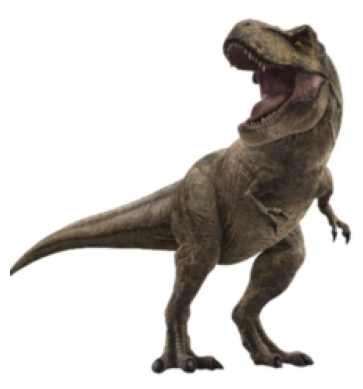

In [7]:
# Display the original image
display_image(bmp_img)

**Prediccion del Modelo**

In [8]:
def obtener_clases(ruta_dataset):
    return [nombre for nombre in os.listdir(ruta_dataset) if os.path.isdir(os.path.join(ruta_dataset, nombre))]
especies = obtener_clases('dataset/split/test')

In [9]:
img_array = np.array(resized_img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión para el batch
img_array = img_array / 255.0  # Normalizar los valores de los píxeles si es necesario

In [10]:
predictions = model.predict(img_array)
# Convert predictions to label indices
predicted_indices = np.argmax(predictions, axis=1)
top_prediction = especies[predicted_indices[0]]
print("\n---------- PREDICTIONS SUMMARY ---------- ")
for i in range(len(especies)):
    print(f"{especies[i]}: {(predictions[0][i])*100:.4f}%")

1/1 [==============================] - 2s 2s/step

---------- PREDICTIONS SUMMARY ---------- 
Brachiosaurus: 0.0000%
Pteranodon: 0.0000%
Stegosaurus: 0.0000%
Triceratops: 0.0037%
Tyrannosaurus: 99.9963%


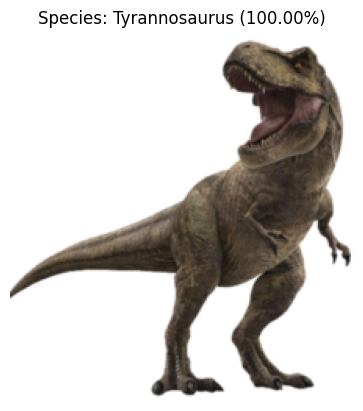

In [11]:
display_prediction(bmp_img, top_prediction, predictions[0][predicted_indices[0]])